# Ising Model (incl. Monte Carlo & SW-algorithm)

## Simulation setup

In [7]:
%matplotlib inline
import time as tm
from types import SimpleNamespace
from Ising_simulation import *

runs = 1
corr_data = np.zeros((runs, 81), dtype = float)

for i in range(runs):
    start_time = tm.time()

    # Simulation initialisation
    sim = SimpleNamespace(MC_steps = 2100,      # Number of monte carlo steps
                          eq_data_points = 2000,# Number of equilibrium data points in MC steps
                          L = 20,               # Grid size in 1 dimension
                          T = 3.5,             # Initial temperature
                          T_steps = 81,        # Number of temperature steps
                          dT = -0.025,          # Temperature increment
                          h = 0,                # Initial magnetic field
                          dh = 0,               # Magnetic increment
                          J = 1,                # Coupling J (Keep at 1)
                          kb = 1,               # Boltzman constant (Keep at 1)
                          spin_init = 'up',     # Initial spin grid (up, down or random)
                          algorithm = 'SW',     # SW (Swendesen Wang) or SF (Spin Flip)
                          bs_trials = 1000,     # Number of boostrap trials, between 500-2000 suffieces
                          )

    sim.spin_site_total_number = sim.L**2       # Total number of spin sites
    sim.MCS = sim.L**2                          # Montecarlo step size
    sim.time_steps = sim.MCS * sim.MC_steps     # Montecarlo time to regular time steps

    # Simulation results
    results = IM_sim(sim)

    end_time = tm.time()
    total_time = end_time - start_time
    results.sim_time = total_time
    
    corr_data[i] = results.int_cor_time[:,0]


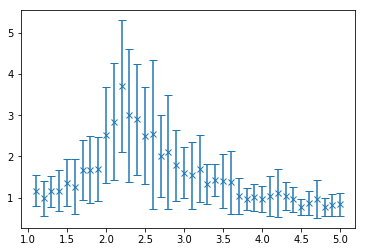

In [43]:
plt.errorbar(results.temperature, np.mean(corr_data,axis= 0), yerr = np.std(corr_data, axis = 0), fmt = 'x', markersize = 6, capsize = 4)
plt.show()

## Data processing

In [8]:
from importlib import reload
import data_processing
reload(data_processing)
from data_processing import *

identifier = 'L20'
data_dir = './exported_data/'        # Directory where data should be stored 
fig_dir = './exported_figs/'         # Directory where figures should be saved
save_fig = True                      # Should figure be saved?

save_data(sim, results, data_dir, identifier)
plot_func(sim, results, fig_dir, identifier, save_fig)
visualize_islands(sim, results, fig_dir, identifier, save_fig)
grid_plot(sim, results, fig_dir, identifier, save_fig)

Data is saved to: ./exported_data/
Figures are saved to: ./exported_figs/
